Code tersebut adalah metode euler yang dapat
digunakan untuk menyelesaikan persamaan differensial
non linear pendulum. Misal metode tersebut disimpan di
modul bernama solver.py
Soal:
1. Apakah modul solver.py dapat digunakan untuk
menyelesaikan persamaan differensial orde 2
selain kasus non linear pendulum? Jelaskan
mengapa! Yaa dapat, karena modul solver.py dapat menyelesaikan persamaan linier maupun non linier.

2. Implementasikan solver tersebut dengan cara membuat file solver.py

3. Untuk menyelesaikan persamaan dengan solver.py, bentuk fungsi harus diubah menjadi:
d^2a/dt^2 = (-g/L) * (sin(a))
Definisikan fungsi Func sebagai fungsi yang me return nilai -g/L * sin(a)
(didalam ppt tugas 3)

4. Menggunakan Parameter Parameter yang ada dalam tabel diatas, buatlah program yang menggunakan solver.py 
untuk menemukan solusi persamaan diferensial non linear tersebut! Hint( Solusi Akhir berupa plot )
d^2y/dx^2 = -y - dy/dx +sin^2 (x)

5. Perhatikan Persamaan Diferensial Diatas! Buatlah program untuk menyelesaikan PD tersebut dengan
menggunakan solver.py sebagai modul dengan parameter berikut! (didalam ppt tugas 3)

In [11]:
pip install solver


  Created wheel for solver: filename=solver-0.0.4-py3-none-any.whl size=3129 sha256=c7ff4cfae57b6dd8995467373579b56fd93ceae951ca3834e91487d7e2b1ebb4
  Stored in directory: /root/.cache/pip/wheels/66/27/02/f951263ae7f5f0d6b627987a9ca9baefdb4da1f5c6f18fb4f5
Successfully built solver


In [12]:
#euler.py
def euler(t,h,y,dy,Func):
  d2y = Func(t,y,dy)
  y_next = y + (h * dy)
  dy_next = dy + (h * d2y)
  return (y_next, dy_next)

def euler(t,h,y,dy,Func):
  d2y = Func(t,y,dy)
  y_next = y + (h * dy)
  dy_next = dy + (h * d2y)
  return (y_next, dy_next)


def cauchy_euler(params, Func):
  # initial condition
  t0 = params['t0']
  t_akhir = params['t_akhir']
  h = params['h']
  y0 = params['y0']
  dy0 = params['dy0']

  res_euler = []
  t = []
  step = int((t_akhir - t0) / h)

  for i in range(step):
    tm = (i + 1) * h
    (y_next, dy_next) = euler(tm, h, y0, dy0, Func)
    res_euler.append(y_next)
    t.append(tm)
    y0 = y_next
    dy0 = dy_next

  return(t, res_euler)

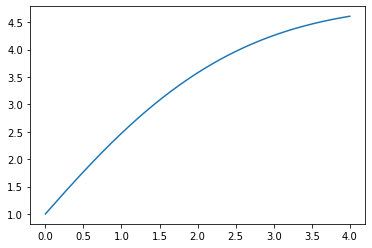

In [13]:
#solusi akhir berupa plot (4)
from solver import *
import matplotlib.pyplot as plt
import math

def pendulumfunc(g, l, a):
  return -(g/l) * math.sin(a)

parameter = {
  'g' : 9.8,
  'y0' : 1,
  't0' : 0,
  't_akhir' : 4,
  'h' : 0.001,
  'dy0' : 0.5 * 3.14
}


t, res = cauchy_euler(parameter, pendulumfunc)

plt.plot(t,res)
plt.show()

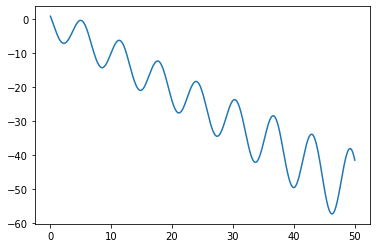

In [14]:
#program untuk menyelesaikan PD (5)
import matplotlib.pyplot as plt
from solver import *
import math

def pd2(y, dy, x):
    return -y - dy - (math.sin(x) ** 2)

parameter1 ={
    't0' : 0,
    't_akhir' : 50,
    'h' : 0.05,
    'y0' : 1,
    'dy0' : -9/2
}

x, y = cauchy_euler(parameter1, pd2)

plt.plot(x,y)
plt.show()